In [3]:
import numpy as np
import matplotlib.pyplot as plt
import integration_functions as int_fun

## Calculate Source term

### in (1+1) dimensions

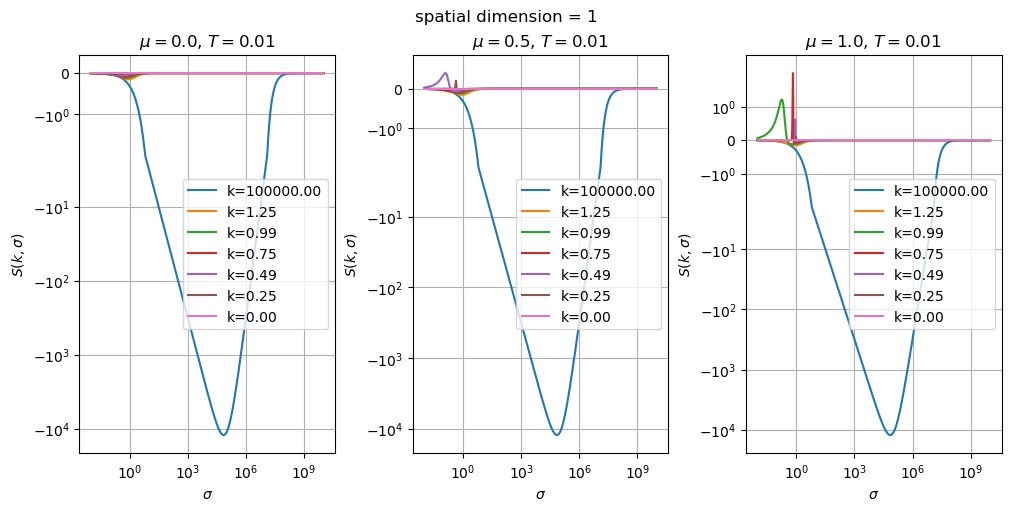

In [4]:
T = 0.01
Lambda = 1e5
spatial_dimension = 1

mu_arr = [0.0, 0.5, 1.0]
k_arr = [1e5, 1.25, 0.99, 0.75, 0.49, 0.25, 0.00]
sigmaMax = 1e10

fig, axes = plt.subplots(1, 3, constrained_layout=True ,figsize=(10,5))

for mu, ax in zip(mu_arr, axes):
    args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, 2)
    for k in k_arr:
        grid = np.geomspace(0.01, sigmaMax, 1000)
        S = int_fun.S(k, grid, *args)

        ax.plot(grid, S, label=f'k={k:.2f}')

    ax.legend()
    ax.grid()
    ax.set_yscale("symlog")
    ax.set_xscale("log")
    ax.set_ylabel(r'$S(k, \sigma)$')
    ax.set_xlabel(r'$\sigma$')
    ax.set_title(r'$\mu={muval}$, $T={tval}$'.format(muval=mu, tval=T))

fig.suptitle("spatial dimension = 1")
plt.show()

### in (2+1) dimensions

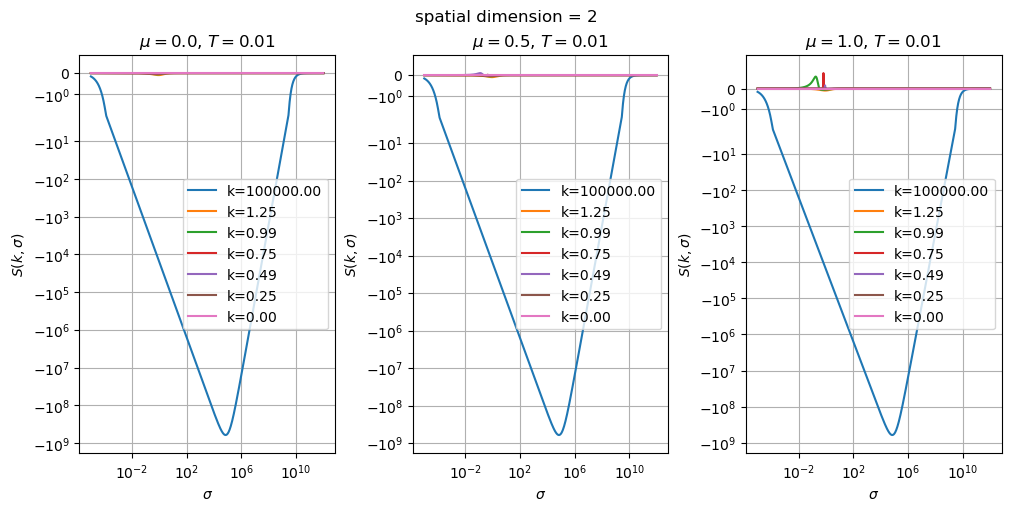

In [5]:
T = 0.01
Lambda = 1e5
spatial_dimension = 2

mu_arr = [0.0, 0.5, 1.0]
k_arr = [1e5, 1.25, 0.99, 0.75, 0.49, 0.25, 0.00]
sigmaMax = 1e12

fig, axes = plt.subplots(1, 3, constrained_layout=True ,figsize=(10,5))

for mu, ax in zip(mu_arr, axes):
    args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, 2)
    for k in k_arr:
        grid = np.geomspace(0.00001, sigmaMax, 1000)
        S = int_fun.S(k, grid, *args)

        ax.plot(grid, S, label=f'k={k:.2f}')

    ax.legend()
    ax.grid()
    ax.set_yscale("symlog")
    ax.set_xscale("log")
    ax.set_ylabel(r'$S(k, \sigma)$')
    ax.set_xlabel(r'$\sigma$')
    ax.set_title(r'$\mu={muval}$, $T={tval}$'.format(muval=mu, tval=T))

fig.suptitle("spatial dimension = 2")
plt.show()

# Calculate flow with parameters of arXiv:1212.4624v1

They use two parameter sets which can be converted with

\begin{align}
\sigma_0 = m_f/h_{\Lambda}
\end{align}

1. $h_{\Lambda} = 18.0, m_f = 1.0 \rightarrow h = 18.0, \sigma_0 = 0.05\bar{5}$
2. $h_{\Lambda} = 6.0, m_f = 5.0 \rightarrow h = 6.0, \sigma_0 = 1.2$

In addition, the use $\Lambda = 100$. I don't know what IR cutoff they use, but I just go to $k_{ir} = 10^{-4}$ and I think this is enought. 

In [1]:
import Grid
import importlib
import Flow
importlib.reload(Flow)

import integration_functions as int_fun
importlib.reload(int_fun)

import dataClass #import the module here, so that it can be reloaded.
importlib.reload(dataClass)

path = './boundary_tests'

## Set 1.

For $N_f=2$, $T_{crit}/m_f = 0.49$. Therefore $T_{crit} = 0.49$ for Set 1.

Grid from 0 to 100.00, with 2000 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.050 (0.050)
    Integration done from 0 (1.0e+01) to 9.210 (1.0e-03); time elapsed = 3.41 seconds
Λ = 1.0e+01 -> 1.0e-03; NGrid = 2000; sigma_max = 100.0; tolerances = 5e-14; time = 3.41
Additional parameters: NFlavor = 20; T = 0.01; extrapolation_order = 1; grid_style = UniformGrid; h = 1.00; mu = 0.00; sigma_0 = 1.00; spatial_dimension = 2


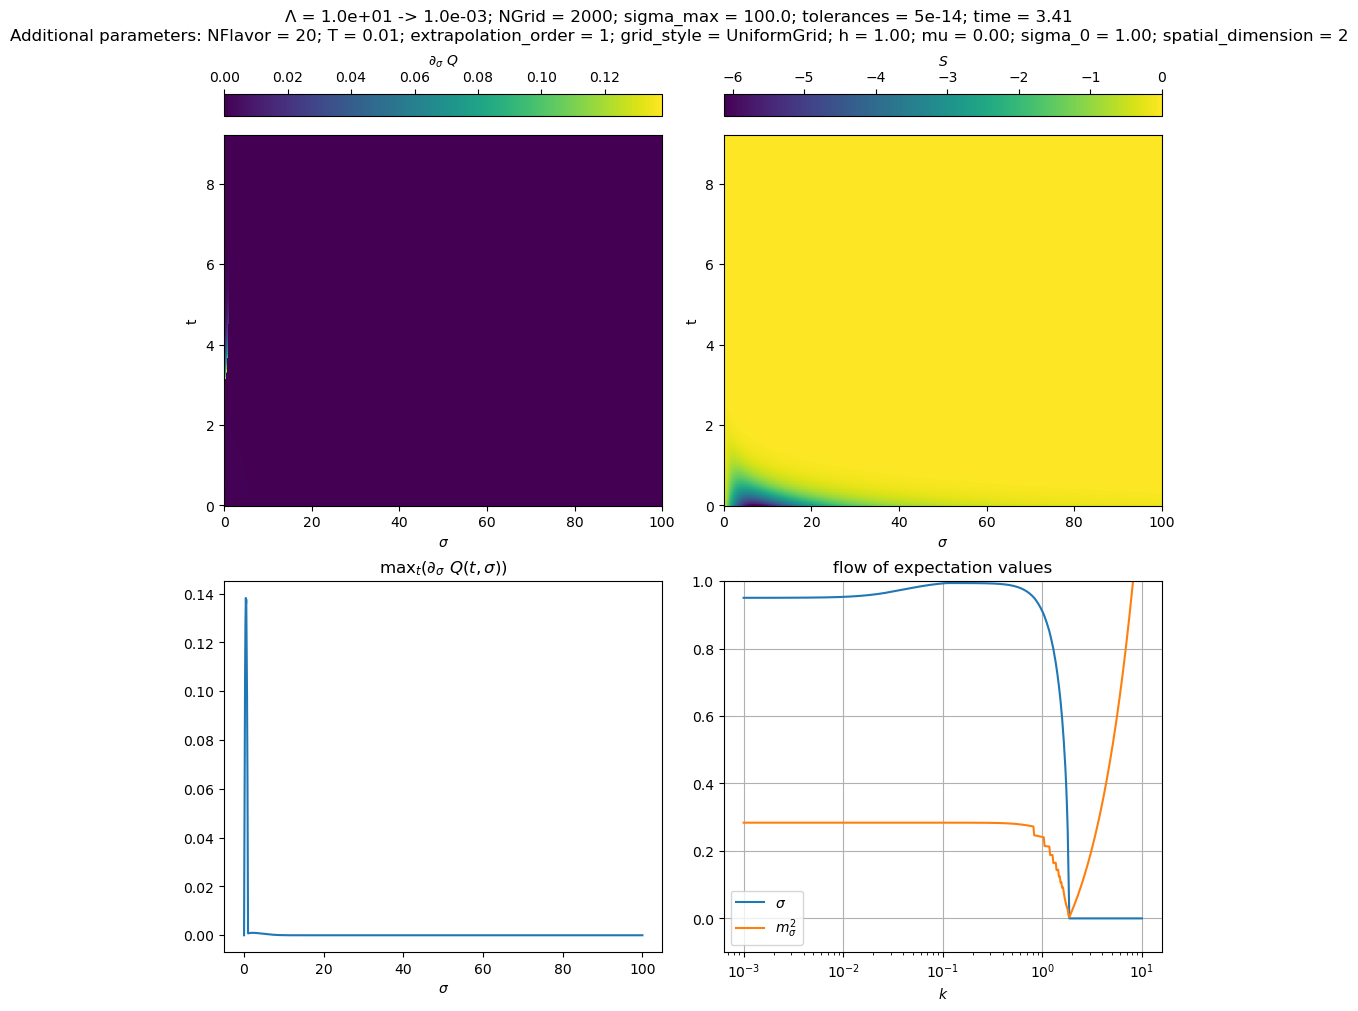

In [15]:
spatial_dimension = 2
Lambda = 10
kir = 1e-3
n_flavor = 20
# n_flavor = np.Inf
mu = 0.0
T = 0.01
tolerance = 5e-14

# configure spatial domain
n_grid = 2000
sigma_max = 100
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

# args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 18.0, 0.056)
args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 1.0, 1.0)

filename = int_fun.generate_filename(
    mu, T, sigma_max, n_grid, kir, tolerance, *args)

storage_dict = int_fun.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, filename=filename, initial_condition=int_fun.initial_condition, Q=int_fun.Q, S=int_fun.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, sourcePlot), (maxDiff, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    print(f)
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_Q(sourcePlot, part="S")
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()

For $N_f=20$, $T_{crit}/m_f = 0.65$. Therefore $T_{crit} = 0.65$ for Set 1.

Grid from 0 to 6.00, with 1000 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.006 (0.006)
    Integration done from 0 (1.0e+02) to 13.816 (1.0e-04); time elapsed = 1.13 seconds
Λ = 1.0e+02 -> 1.0e-04; NGrid = 1000; sigma_max = 6.0; tolerances = 5e-14; time = 1.13
Additional parameters: NFlavor = 20; T = 0.10; extrapolation_order = 1; grid_style = UniformGrid; h = 18.00; mu = 0.00; sigma_0 = 0.06; spatial_dimension = 2


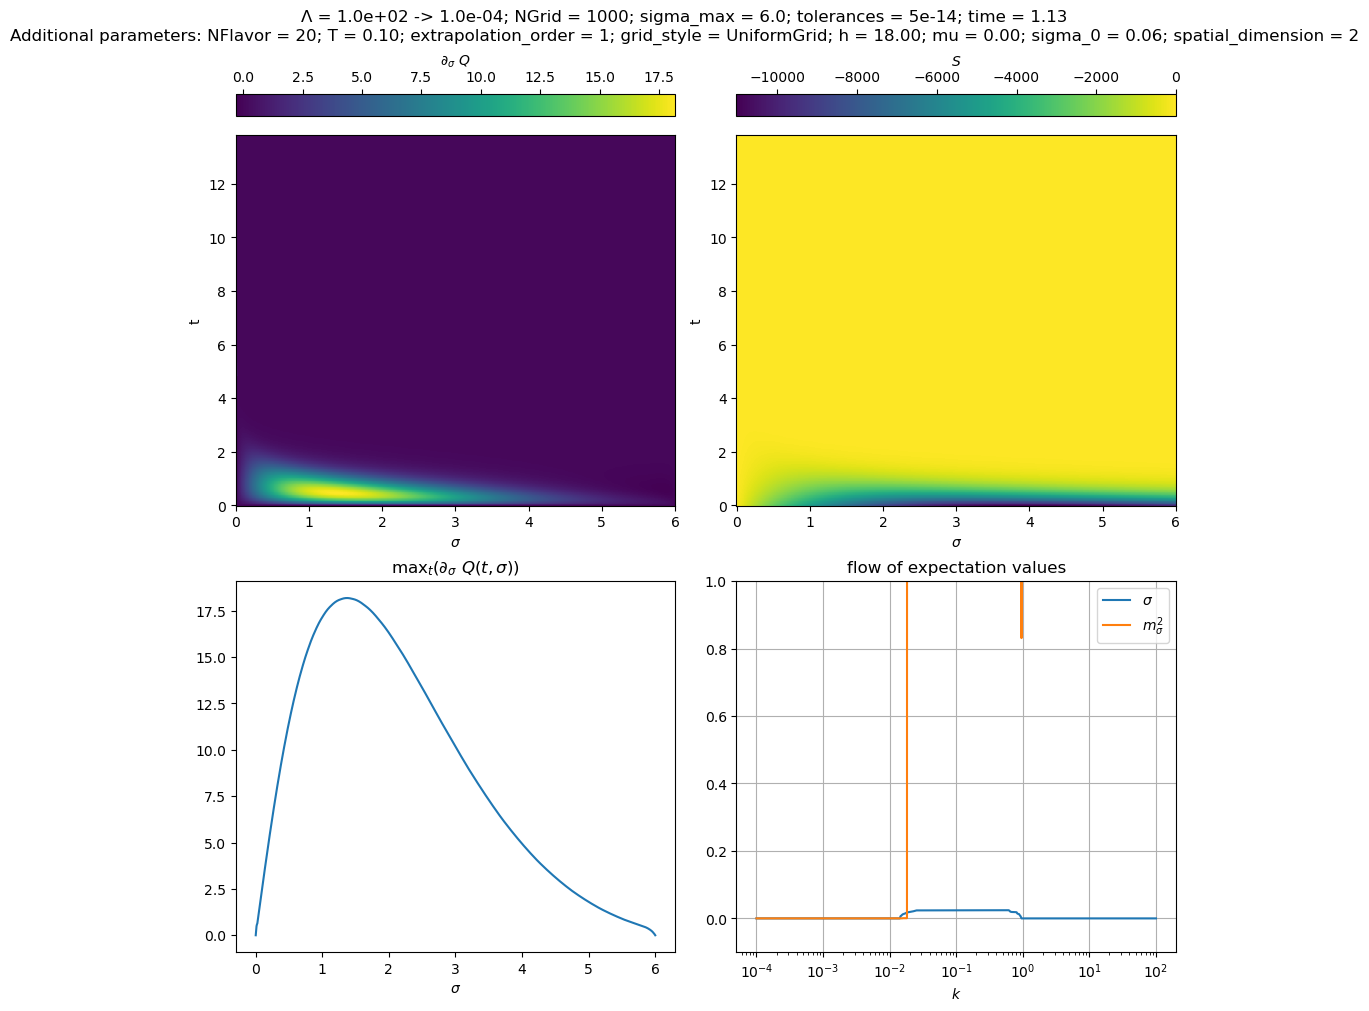

In [5]:
spatial_dimension = 2
Lambda = 100
kir = 1e-4
n_flavor = 20
# n_flavor = np.Inf
mu = 0.0
T = 0.1
tolerance = 5e-14

# configure spatial domain
n_grid = 1000
sigma_max = 6
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 18.0, 0.056)

filename = int_fun.generate_filename(
    mu, T, sigma_max, n_grid, kir, tolerance, *args)

storage_dict = int_fun.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, filename=filename, initial_condition=int_fun.initial_condition, Q=int_fun.Q, S=int_fun.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, sourcePlot), (maxDiff, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    print(f)
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_Q(sourcePlot, part="S")
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()

## Set 2

For $N_f=2$, $T_{crit}/m_f = 0.45$. Therefore $T_{crit} = 2.25$ for Set 2.

Grid from 0 to 12.00, with 2000 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.006 (0.006)
    Integration done from 0 (1.0e+02) to 18.421 (1.0e-06); time elapsed = 1.02 seconds
Λ = 1.0e+02 -> 1.0e-06; NGrid = 2000; sigma_max = 12.0; tolerances = 5e-14; time = 1.02
Additional parameters: NFlavor = 2; T = 2.00; extrapolation_order = 1; grid_style = UniformGrid; h = 6.00; mu = 0.00; sigma_0 = 0.06; spatial_dimension = 2


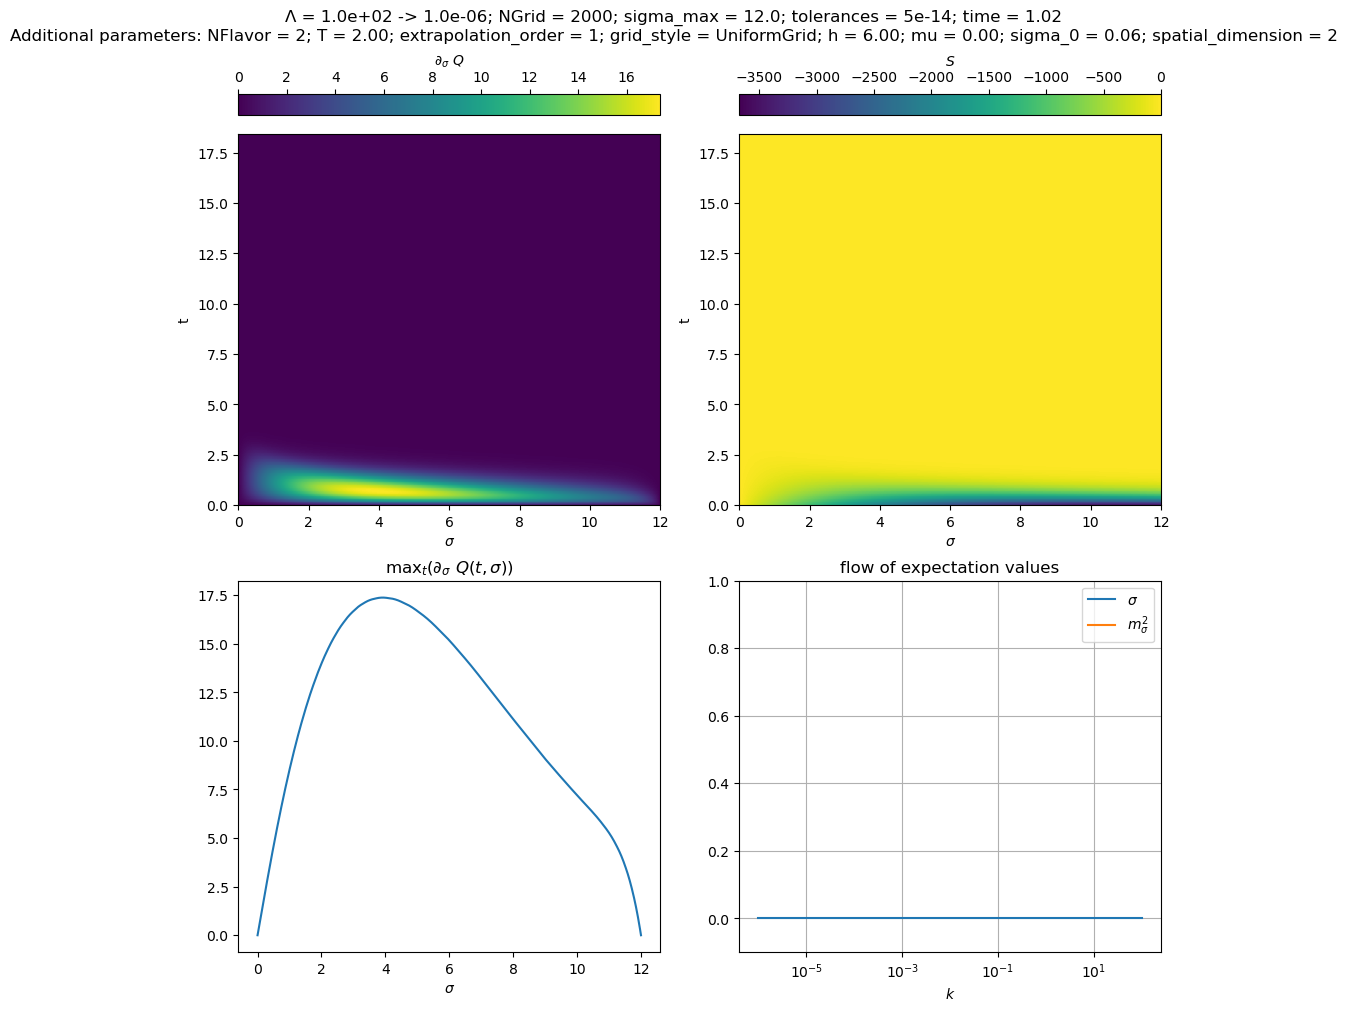

In [15]:
spatial_dimension = 2
Lambda = 100
kir = 1e-6
n_flavor = 2
# n_flavor = np.Inf
mu = 0.0
T = 2.0
tolerance = 5e-14

# configure spatial domain
n_grid = 2000
sigma_max = 12
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 6.0, 0.056)

filename = int_fun.generate_filename(
    mu, T, sigma_max, n_grid, kir, tolerance, *args)

storage_dict = int_fun.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, filename=filename, initial_condition=int_fun.initial_condition, Q=int_fun.Q, S=int_fun.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, sourcePlot), (maxDiff, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    print(f)
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_Q(sourcePlot, part="S")
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()

For $N_f=2$, $T_{crit}/m_f = 0.65$. Therefore $T_{crit} = 3.25$ for Set 2.

Grid from 0 to 12.00, with 2000 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.006 (0.006)
    Integration done from 0 (1.0e+02) to 13.816 (1.0e-04); time elapsed = 0.79 seconds
Λ = 1.0e+02 -> 1.0e-04; NGrid = 2000; sigma_max = 12.0; tolerances = 5e-14; time = 0.79
Additional parameters: NFlavor = 20; T = 4.40; extrapolation_order = 1; grid_style = UniformGrid; h = 6.00; mu = 0.00; sigma_0 = 0.06; spatial_dimension = 2


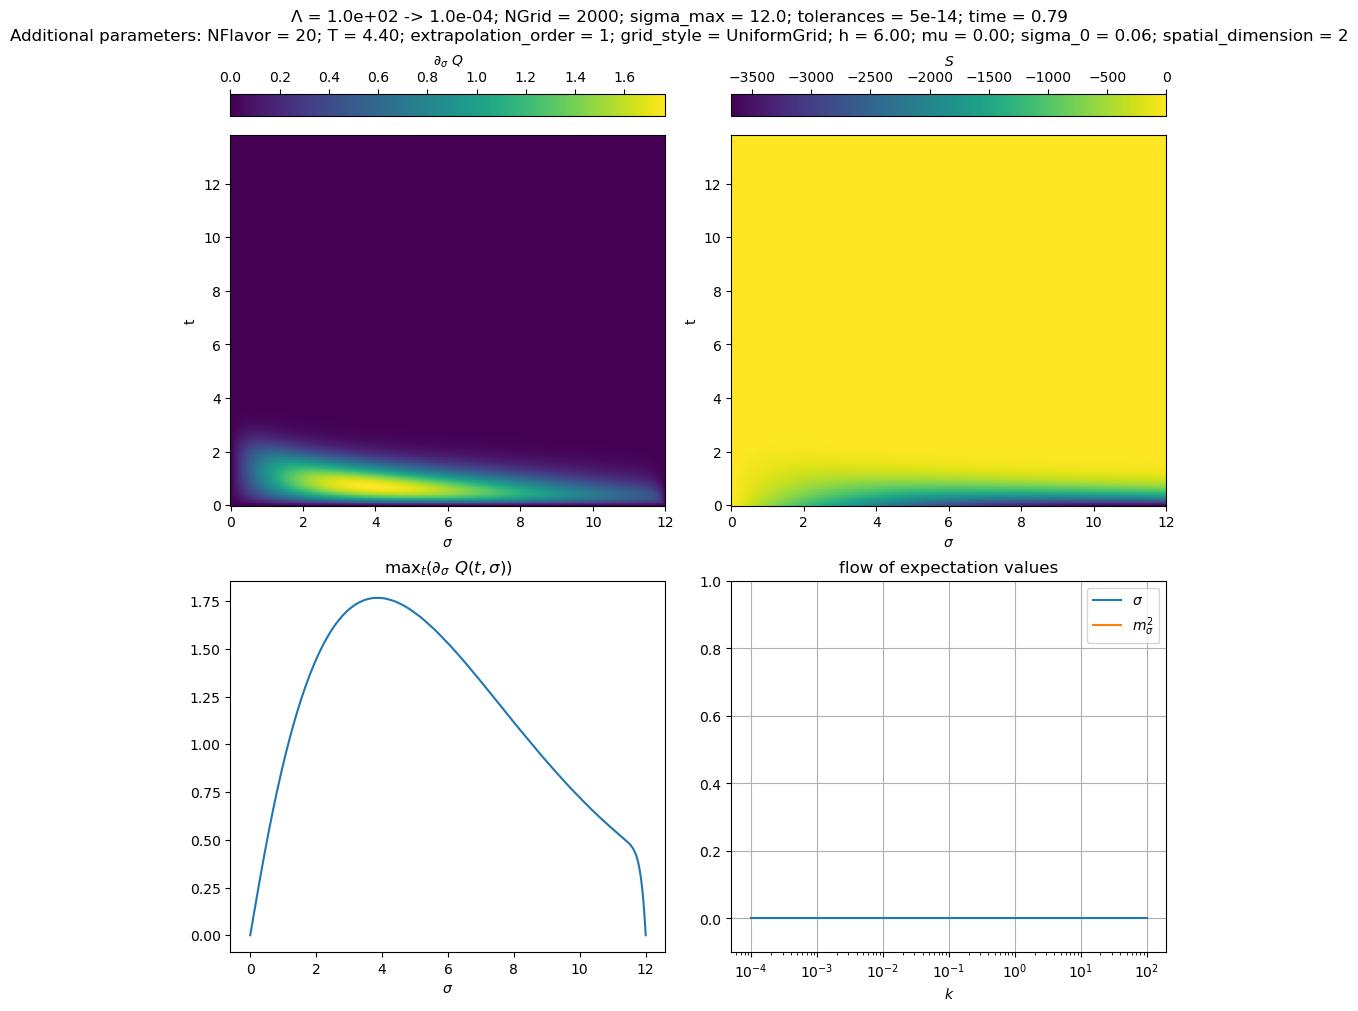

In [14]:
spatial_dimension = 2
Lambda = 100
kir = 1e-4
n_flavor = 20
# n_flavor = np.Inf
mu = 0.0
T = 4.4
tolerance = 5e-14

# configure spatial domain
n_grid = 2000
sigma_max = 12
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 6.0, 0.056)

filename = int_fun.generate_filename(
    mu, T, sigma_max, n_grid, kir, tolerance, *args)

storage_dict = int_fun.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, filename=filename, initial_condition=int_fun.initial_condition, Q=int_fun.Q, S=int_fun.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, sourcePlot), (maxDiff, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    print(f)
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_Q(sourcePlot, part="S")
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()

# Calculate Quark-Meson-Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Grid
import importlib
import Flow
importlib.reload(Flow)

import quark_meson_model as qmm
importlib.reload(qmm)
import dataClass #import the module here, so that it can be reloaded.
importlib.reload(dataClass)

path = "./boundary_tests"

Grid from 0 to 3.87, with 256 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.015 (0.015)
    Integration done from 0 (7.5e+00) to 6.000 (1.9e-02); time elapsed = 1.13 seconds
Λ = 7.5e+00 -> 1.9e-02; NGrid = 256; sigma_max = 3.9; tolerances = 5e-14; time = 1.13
Additional parameters: extrapolation_order = 1; grid_style = UniformGrid; h = 1.50; lambda = 1; massSquare = 0; spatial_dimension = 3


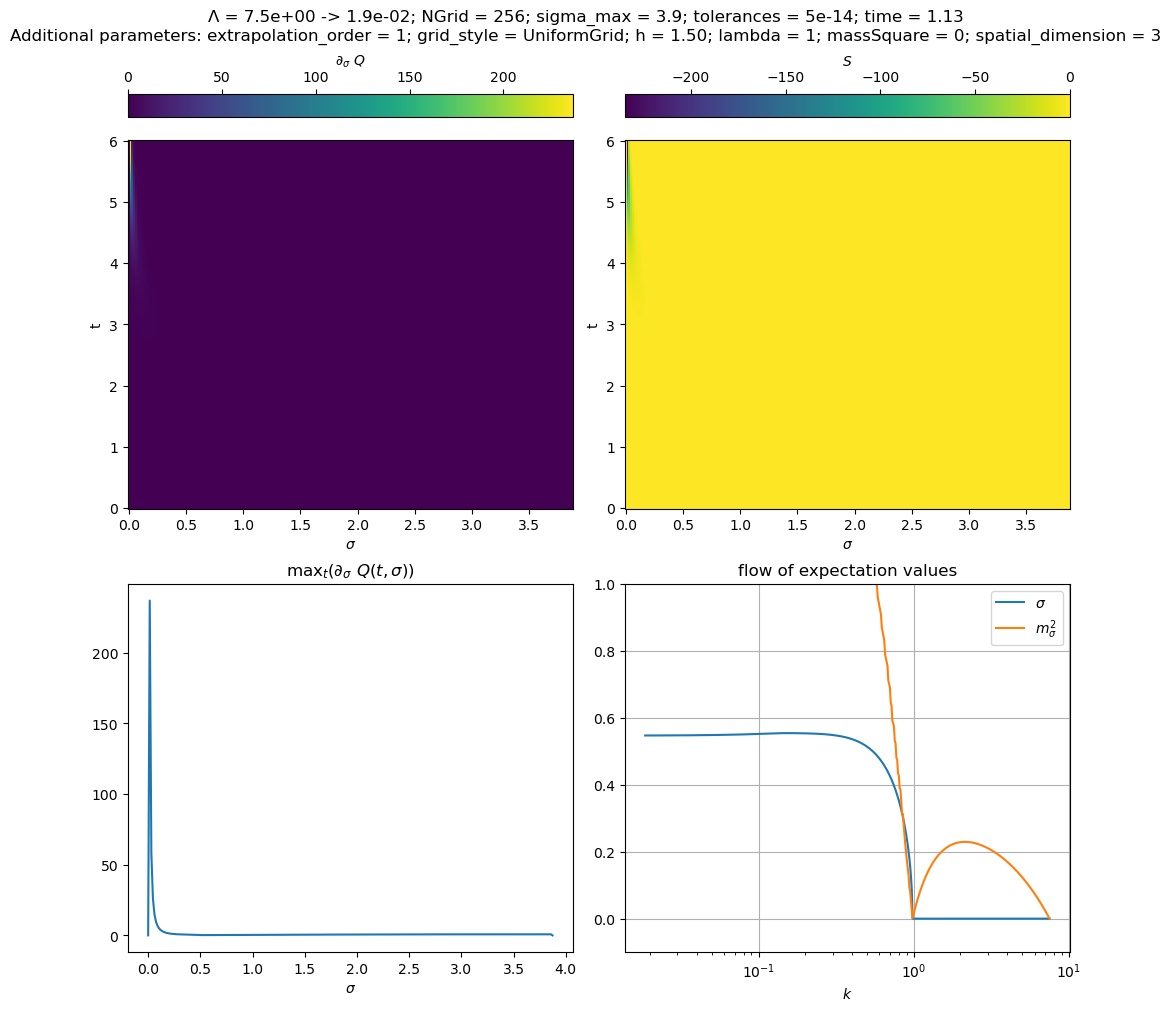

In [6]:
spatial_dimension = 3
Lambda = 7.5
tir = 6.0
kir = Lambda * np.exp(-tir)
tolerance = 5e-14
massSquare = 0
small_lambda = 1
h = 1.5

# configure spatial domain
n_grid = 256
sigma_max = np.sqrt(15)
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

args = qmm.generate_args(massSquare, small_lambda, h, spatial_dimension)

filename = qmm.generate_filename(Lambda, sigma_max, n_grid, tir, tolerance, *args)

storage_dict = qmm.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, filename=filename, initial_condition=qmm.initial_condition, Q=qmm.Q, S=qmm.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, sourcePlot), (maxDiff, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    print(f)
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_Q(sourcePlot, part="S")
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()

# print(flow.observable_array["sigma"])